SUPPORT VECTOR MACHINES

1. KERNEL LINEAL

In [296]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC


Cargamos los datos de X e y

In [297]:
data = loadmat('C:/Users/carli_000/Desktop/AA/p6/ex6data1.mat')
X =data['X']
y =data['y'].ravel()


Pintamos los datos de el primer archivo

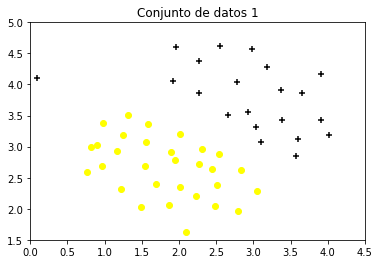

In [236]:
positivos = y == 1
negativos = y == 0
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.scatter(X[positivos,0], X[positivos,1], marker='+' , c='k')
plt.scatter(X[negativos,0], X[negativos,1],marker ='o', c='yellow')
plt.title("Conjunto de datos 1")
plt.show()

Se muestra el resultado del entrenamiento con C = 1  y C = 100

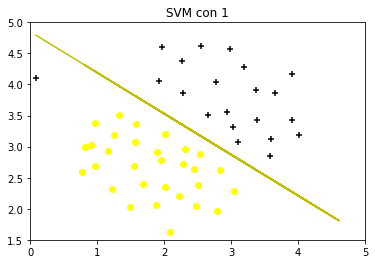

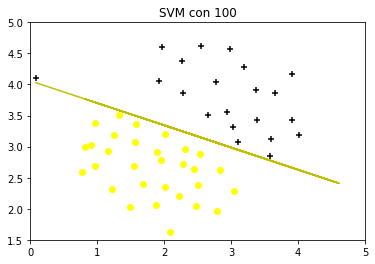

In [237]:
def svmC(C, num):
   
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    #SVC(C=1.0, kernel='rbf', tol =0.001, max_iter=1)
    positivos = y == 1
    negativos = y == 0
    plt.scatter(X[positivos,0], X[positivos,1], marker='+' , c='k')
    plt.scatter(X[negativos,0], X[negativos,1],marker ='o', c='yellow')
    #plt.visualize_boundary(X,y,svm)
    plt.xlim([0, 5])
    plt.ylim([1.5,5])
    w =svm.coef_[0]
    a = -w[0] / w[1]
    yy = a * X - (svm.intercept_[0]) / w[1]

    plt.plot(X, yy, 'k-', color='y')
    plt.title(num)
    plt.show()
svmC(1.0, "SVM con 1")
svmC(100, "SVM con 100")

2. KERNEL GAUSSIANO

In [298]:
data = loadmat('C:/Users/carli_000/Desktop/AA/p6/ex6data2.mat')
X=data['X']
y=data['y'].ravel()


Se muestran los datos del fichero 2

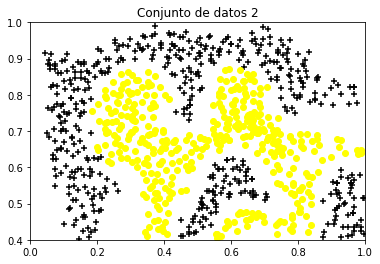

In [227]:
positivos = y == 1
negativos = y == 0
plt.xlim([0,1.0])
plt.ylim([0.4,1.0])
plt.scatter(X[positivos,0], X[positivos,1], marker='+' , c='k')
plt.scatter(X[negativos,0], X[negativos,1],marker ='o', c='yellow')
plt.title("Conjunto de datos 2")
plt.show()

Se calcula el kernel gaussiano

In [228]:
def kernelGaussiano(x1,x2,sigma):
       return  np.exp(-np.sum(np.power(x1 - x2,2)) / (2.0 * sigma ** 2))
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
kernelGaussiano(x1, x2, sigma)

0.32465246735834974

Se muestra la frontera no lineal definida por el modelo de SVM calculado con
el kernel RBF

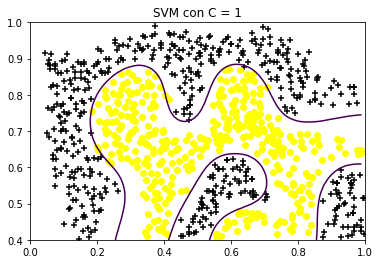

In [239]:
def svmC2(C, num, sigma):
   
    svm = SVC(kernel='rbf', C=C, gamma = 1 / (2 * sigma**2),probability =True)
    svm.fit(X, y)
    #SVC(C=1.0, kernel='rbf', tol =0.001, max_iter=1)
    positivos = y == 1
    negativos = y == 0
    plt.scatter(X[positivos,0], X[positivos,1], marker='+' , c='k')
    plt.scatter(X[negativos,0], X[negativos,1],marker ='o', c='yellow')
    px = np.arange(0, 1, 0.01)
    py = np.arange(0, 1, 0.01)
    PX, PY = np.meshgrid(px, py) 
    XX = np.c_[PX.ravel(), PY.ravel()]
    Z = svm.predict_proba(XX)[:,1]
    Z = Z.reshape(PX.shape)
    plt.contour(PX, PY, Z, levels=[0.5])
    plt.xlim(0.0,1.0)
    plt.ylim(0.4,1.0)
    plt.title(num)
    plt.show()
svmC2(1, "SVM con C = 1", 0.1)

3. Elección de los parámetros C y sigma

In [299]:
data = loadmat('C:/Users/carli_000/Desktop/AA/p6/ex6data3.mat')
X= data['X']
y = data['y'].ravel()
Xval = data['Xval']
yval = data['yval'].ravel()



Se generan modelos para C y  tomando valores del conjunto 0.01, 0.03, 0.1, 0.3, 1, 3,
10, 302, generando un total de 82 = 64 modelos diferentes. Cada modelo lo debes evaluar sobre
el conjunto de datos de validación Xval e yval, calculando el porcentaje de estos ejemplos que
clasifica correctamente.

In [300]:

c_values = np.array([0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0])
gamma_values = 1/ (2* c_values**2)

scores = np.zeros([8,8])
for i_c in range(0,8):
        for i_g in range(0,8):
            svm = SVC(C=c_values[i_c], gamma=gamma_values[i_g], kernel='rbf')
            svm.fit(X, y)
            scores[i_c, i_g] = svm.score(Xval, yval) 



Se pinta la gráfica con los valores más optimos de C y de gamma

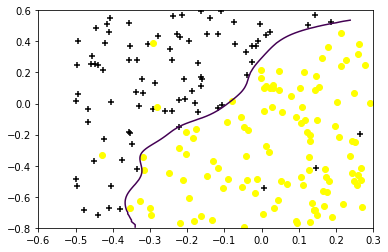

In [295]:
def svmC3(C, num):
    max_idx = np.unravel_index(np.argmax(scores), scores.shape)

    svm = SVC(C=c_values[max_idx[0]], gamma=gamma_values[max_idx[1]], kernel='rbf', probability=True)
    svm.fit(X, y)
    #SVC(C=1.0, kernel='rbf', tol =0.001, max_iter=1)
    positivos = yval == 1
    negativos = yval == 0
    plt.scatter(Xval[positivos,0], Xval[positivos,1], marker='+' , c='k')
    plt.scatter(Xval[negativos,0], Xval[negativos,1],marker ='o', c='yellow')
    px = np.arange(-0.6, 0.25, 0.01)
    py = np.arange(-0.8, 0.6, 0.01)
    PX, PY = np.meshgrid(px, py)
    XX = np.c_[PX.ravel(), PY.ravel()] 
    Z = svm.predict_proba(XX)[:,1] 
    Z = Z.reshape(PX.shape) 
    plt.contour(PX, PY, Z, levels=[0.5])
    plt.xlim([-0.6, 0.3])
    plt.ylim([-0.8, 0.6])
    plt.show()
svmC3(1.0,"SVM con C= 0.3")

Hao Hao He y Carla Paola Peñarrieta Uribe